# General Implementation

### for 3-city example problem


Airline Routing Problem Summary
Number of Routes: 4
Number of Flights: 4
Number of Tails: 2

Penalty Coefficients:
  A (Flight Coverage Constraint): 1.0
  B (Tail Assignment Constraint): 1.0

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 1.0
  Flight 2: Cf_2 = 1.0
  Flight 3: Cf_3 = 1.0
  Flight 4: Cf_4 = 1.0

Route Costs:
  Route 1: c_1 = 100
  Route 2: c_2 = 0
  Route 3: c_3 = 0
  Route 4: c_4 = 0

Flight-Route Incidence Matrix (afr):
[[1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]]

Tail-Route Incidence Matrix (btr):
[[1 0 1 0]
 [0 1 0 1]]

QUBO Linear Coefficients (h):
[95. -5. -5. -5.]

QUBO Coupling Matrix (J):
[[0. 0. 4. 2.]
 [0. 0. 2. 4.]
 [4. 2. 0. 0.]
 [2. 4. 0. 0.]]

Starting QAOA optimization with 3 layer(s)...
Optimizing 6 parameters: (γ_0, β_0) (γ_1, β_1) (γ_2, β_2) 

Optimization complete!
Optimal parameters:
  Layer 0: γ_0 = 2.0392, β_0 = 0.4383
  Layer 1: γ_1 = 0.5435, β_1 = 0.9807
  Layer 2: γ_2 = 0.3445, β_2 = 0.7881
Final expectation: 28.8418
{'0000': 1371,

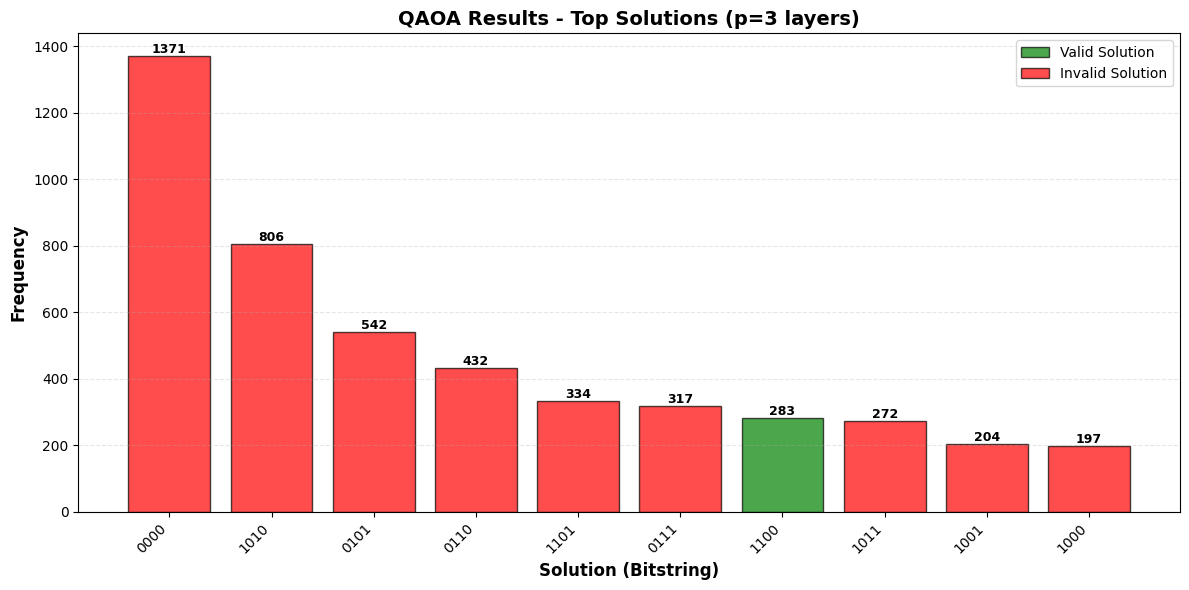


QAOA Histogram Summary
Total unique solutions found: 16
Displaying top 10 solutions
QAOA layers (p): 3
Valid solutions in top 10: 1/10

Best valid solution:
  Bitstring: 1100
  Frequency: 283
  Energy: -10.0000
  Selected routes: [2, 3]


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=3 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [30]:
from airlines_qaoa import Airlines
import numpy as np
from qiskit.visualization import plot_histogram

afr = np.array([
        [1, 0, 1, 0],  # F1 in R1, R3
        [0, 1, 0, 1],  # F2 in R2, R4
        [1, 0, 0, 1],  # F3 in R1, R4
        [0, 1, 1, 0]   # F4 in R2, R3
    ])

btr = np.array([
        [1, 0, 1, 0],  # Tail A assigned to R1, R3
        [0, 1, 0, 1]   # Tail B assigned to R2, R4
    ])

qaoa = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=[100,0,0,0],
        penalty_A=1.0,
        penalty_B=1.0,
        flight_penalties=np.ones(4),
    )

qaoa.problem_summary()

qaoa.build_qaoa(p_layers=3)

results = qaoa.optimize(p_layers=3, initial_params=[1.0, 1.0,1,1,1,1], shots=1024)
print(results['counts'])

solutions = qaoa.analyze_results(results['counts'], top_k=5)

qaoa.plot_qaoa_histogram(results, top_k=10)

# Simulated annealing


Simulated Annealing Result:
Best Bitstring: 1100
Best Energy: -10.0000
Valid Solution: ✓


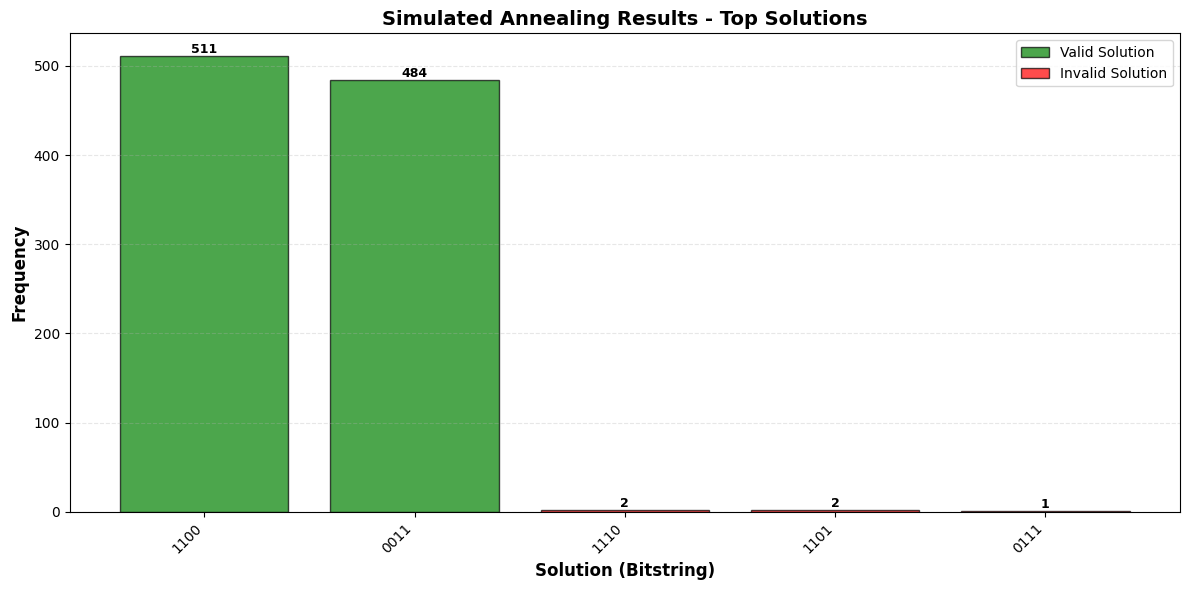


Simulated Annealing Histogram Summary
Total unique solutions found: 5
Displaying top 5 solutions
Valid solutions in top 10: 2/5


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Simulated Annealing Results - Top Solutions'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [31]:
setup = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=[0,0,0,0],
        penalty_A=1.0,
        penalty_B=1.0,
        flight_penalties=np.ones(4),  # Higher penalties for unassigned flights
    )

sa = setup.simulated_annealing(num_reads=1000)
setup.plot_sa_histogram(sa, top_k=10)

### 5 city example problem


Airline Routing Problem Summary
Number of Routes: 5
Number of Flights: 6
Number of Tails: 3

Penalty Coefficients:
  A (Flight Coverage Constraint): 1
  B (Tail Assignment Constraint): 1

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 1.0
  Flight 2: Cf_2 = 1.0
  Flight 3: Cf_3 = 1.0
  Flight 4: Cf_4 = 1.0
  Flight 5: Cf_5 = 1.0
  Flight 6: Cf_6 = 1.0

Route Costs:
  Route 1: c_1 = 0.0
  Route 2: c_2 = 0.0
  Route 3: c_3 = 0.0
  Route 4: c_4 = 0.0
  Route 5: c_5 = 0.0

Flight-Route Incidence Matrix (afr):
[[1 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 1 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]

Tail-Route Incidence Matrix (btr):
[[1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 0 0 1]]

QUBO Linear Coefficients (h):
[-5. -3. -3. -7. -3.]

QUBO Coupling Matrix (J):
[[0. 0. 4. 0. 0.]
 [0. 0. 0. 4. 0.]
 [4. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Starting QAOA optimization with 8 layer(s)...
Optimizing 16 parameters: (γ_0, β_0) (γ_1, β_1) (γ_2, β_2) (γ_3, β_3) (γ_4, β_4) (γ_5, β_5) (γ_6, β_6) (

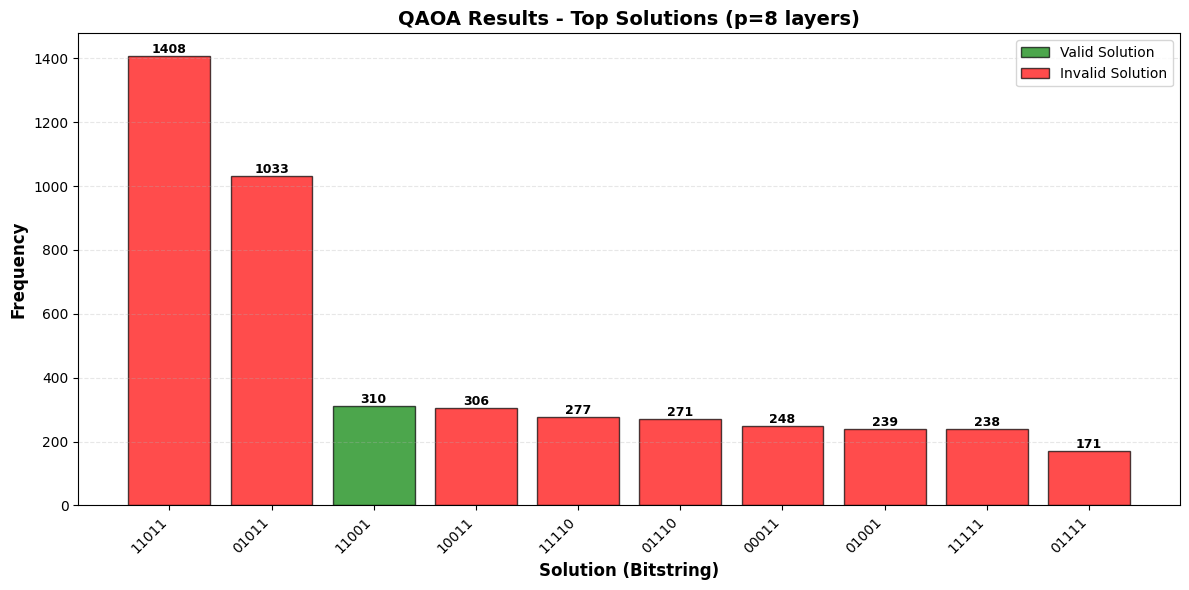


QAOA Histogram Summary
Total unique solutions found: 29
Displaying top 10 solutions
QAOA layers (p): 8
Valid solutions in top 10: 1/10

Best valid solution:
  Bitstring: 11001
  Frequency: 310
  Energy: -15.0000
  Selected routes: [0, 3, 4]


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=8 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [32]:

    
# Example: 6 flights, 5 routes, 3 tails
# This is a made-up example to show generalization
    
afr = np.array([
    [1, 0, 1, 0, 0],  # F1: R0 or R2
    [0, 0, 0, 1, 0],  # F2: R3 ONLY (Forces R3)
    [0, 0, 0, 0, 1],  # F3: R4 ONLY (Forces R4)
    [0, 1, 0, 1, 0],  # F4: R1 or R3 (R3 covers it)
    [1, 0, 0, 0, 0],  # F5: R0 ONLY (Forces R0)
    [0, 0, 0, 1, 0],  # F6: CHANGED to only R3 (Removes conflict with R4)
])

# Tails remain the same
btr = np.array([
    [1, 0, 1, 0, 0],  # Tail 1
    [0, 1, 0, 1, 0],  # Tail 2
    [0, 0, 0, 0, 1],  # Tail 3
])
# Create QAOA instance
qaoa = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=np.zeros(5),  # Different costs for each route
        penalty_A=1,
        penalty_B=1,
        flight_penalties=np.ones(6)
    )
    
# Print problem summary
qaoa.problem_summary()
    
# Build circuit
qaoa.build_qaoa(p_layers=8)
    
# Optimize
results = qaoa.optimize(p_layers=8, initial_params=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], shots=1024)
    
# Analyze results
solutions = qaoa.analyze_results(results['counts'], top_k=10)
    
# Visualize top_k solutions
qaoa.plot_qaoa_histogram(results, top_k=10)   

## Simulated Annealing



Simulated Annealing Result:
Best Bitstring: 11001
Best Energy: -15.0000
Valid Solution: ✓


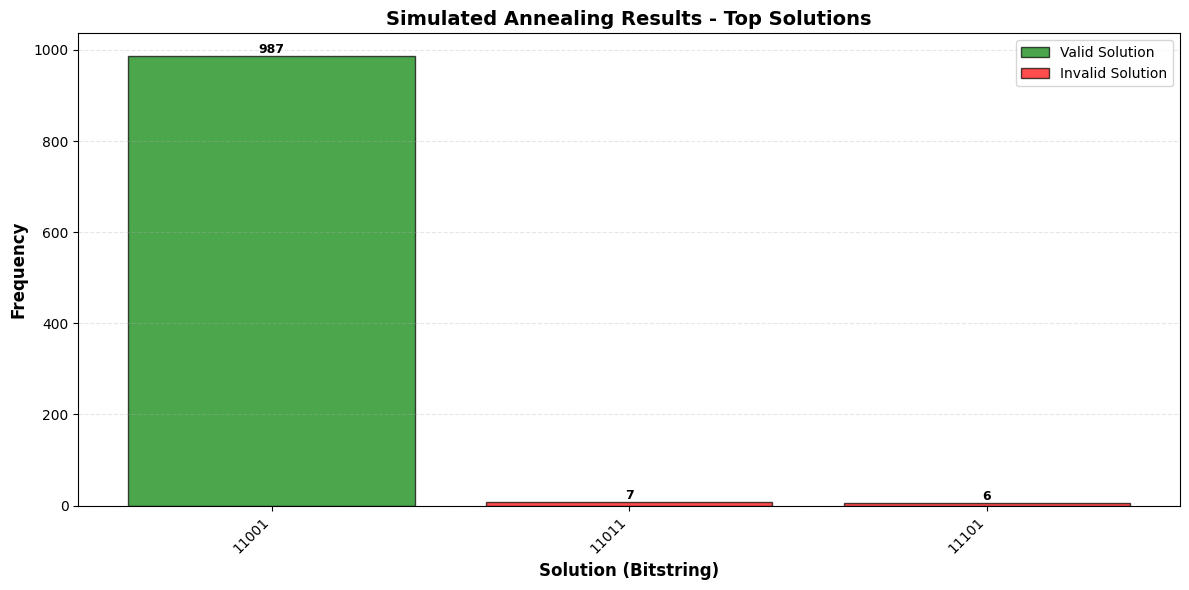


Simulated Annealing Histogram Summary
Total unique solutions found: 3
Displaying top 3 solutions
Valid solutions in top 10: 1/3


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Simulated Annealing Results - Top Solutions'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [34]:
setup = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=np.zeros(5),  # Different costs for each route
        penalty_A=1,
        penalty_B=1,
        flight_penalties=np.ones(6)
    )

sa = setup.simulated_annealing(num_reads=1000)
setup.plot_sa_histogram(sa, top_k=10)